## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import tensorflow.keras as keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
# 在本例中，我們將 train 作為訓練資料、 test 作為測試資料
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=256, 
                    validation_data=(x_test, y_test), 
                    shuffle=True, 
                    verbose=2)

Epoch 1/100
196/196 - 4s - loss: 1.9192 - accuracy: 0.3078 - val_loss: 1.7663 - val_accuracy: 0.3681 - 4s/epoch - 21ms/step
Epoch 2/100
196/196 - 3s - loss: 1.7106 - accuracy: 0.3891 - val_loss: 1.6535 - val_accuracy: 0.4077 - 3s/epoch - 16ms/step
Epoch 3/100
196/196 - 3s - loss: 1.6143 - accuracy: 0.4247 - val_loss: 1.6230 - val_accuracy: 0.4200 - 3s/epoch - 17ms/step
Epoch 4/100
196/196 - 4s - loss: 1.5556 - accuracy: 0.4443 - val_loss: 1.5439 - val_accuracy: 0.4541 - 4s/epoch - 22ms/step
Epoch 5/100
196/196 - 3s - loss: 1.4967 - accuracy: 0.4673 - val_loss: 1.5171 - val_accuracy: 0.4557 - 3s/epoch - 17ms/step
Epoch 6/100
196/196 - 4s - loss: 1.4613 - accuracy: 0.4790 - val_loss: 1.4819 - val_accuracy: 0.4743 - 4s/epoch - 19ms/step
Epoch 7/100
196/196 - 4s - loss: 1.4204 - accuracy: 0.4926 - val_loss: 1.4780 - val_accuracy: 0.4703 - 4s/epoch - 20ms/step
Epoch 8/100
196/196 - 4s - loss: 1.3866 - accuracy: 0.5066 - val_loss: 1.4796 - val_accuracy: 0.4764 - 4s/epoch - 21ms/step
Epoch 9/

Epoch 67/100
196/196 - 3s - loss: 0.4591 - accuracy: 0.8338 - val_loss: 2.2620 - val_accuracy: 0.5091 - 3s/epoch - 17ms/step
Epoch 68/100
196/196 - 3s - loss: 0.4643 - accuracy: 0.8325 - val_loss: 2.3371 - val_accuracy: 0.5132 - 3s/epoch - 17ms/step
Epoch 69/100
196/196 - 3s - loss: 0.4372 - accuracy: 0.8427 - val_loss: 2.3405 - val_accuracy: 0.5094 - 3s/epoch - 17ms/step
Epoch 70/100
196/196 - 4s - loss: 0.4409 - accuracy: 0.8424 - val_loss: 2.3455 - val_accuracy: 0.5201 - 4s/epoch - 19ms/step
Epoch 71/100
196/196 - 4s - loss: 0.4252 - accuracy: 0.8472 - val_loss: 2.4664 - val_accuracy: 0.5129 - 4s/epoch - 19ms/step
Epoch 72/100
196/196 - 3s - loss: 0.4212 - accuracy: 0.8486 - val_loss: 2.4413 - val_accuracy: 0.5178 - 3s/epoch - 17ms/step
Epoch 73/100
196/196 - 3s - loss: 0.3930 - accuracy: 0.8598 - val_loss: 2.4515 - val_accuracy: 0.5115 - 3s/epoch - 17ms/step
Epoch 74/100
196/196 - 3s - loss: 0.4020 - accuracy: 0.8545 - val_loss: 2.5745 - val_accuracy: 0.5059 - 3s/epoch - 17ms/step


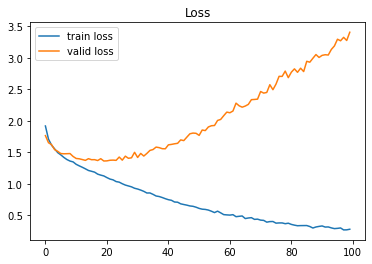

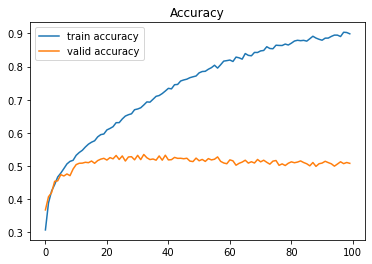

In [7]:
# 以視覺化方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.figure()
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure()
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢